In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows',None)

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree


In [2]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

### The dataset covers both 2 and 4 wheelers which is evident from the above cell

In [5]:
## Figured out a logic that vehicles with present price less than 2 lakhs
df[df['Present_Price']>2].shape, df[df['Present_Price']<2].shape

((203, 9), (98, 9))

In [6]:
## New feature, containing values 2 and 4
df['Wheeler'] = df['Present_Price'].apply(lambda x:2 if x<2 else 4)

In [7]:
df['Wheeler'].value_counts()

4    203
2     98
Name: Wheeler, dtype: int64

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Wheeler
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,4
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,4
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,4


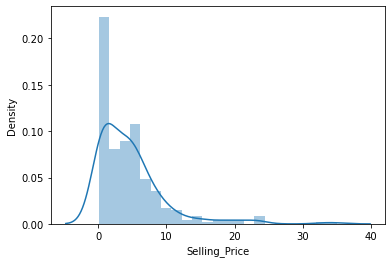

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


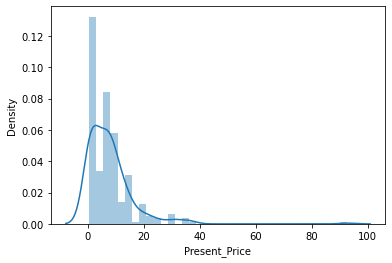

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


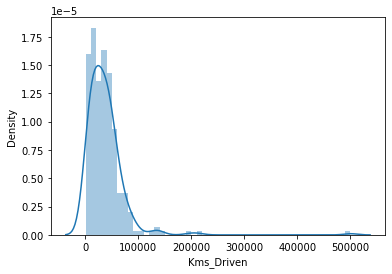

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


In [9]:
## Distribution of numerical features
for i in ['Selling_Price','Present_Price','Kms_Driven']:
    sns.distplot(df[i])
    plt.show()
    print("Z"*100)

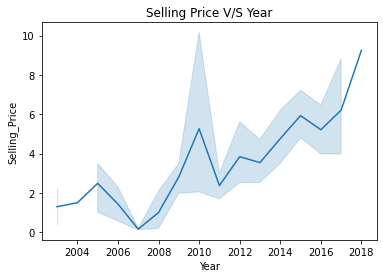

In [10]:
sns.lineplot(x=df.Year,y=df.Selling_Price)
plt.title("Selling Price V/S Year")
plt.show()

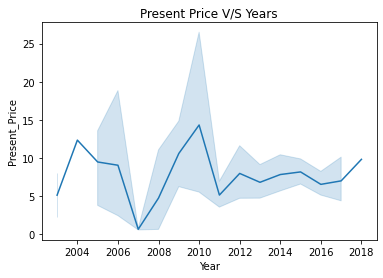

In [11]:
sns.lineplot(x=df.Year,y=df.Present_Price)
plt.title("Present Price V/S Years")
plt.show()

### Above 2 graphs show contrasting results, the present price falls by the year, while selling price is increasing

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
 9   Wheeler        301 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 23.6+ KB


In [13]:
## Current Year
curr_year = 2020

## New feature "No_years" as difference b/w current year and years feature
df["No_years"] = curr_year - df["Year"]

df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Wheeler,No_years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,4,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,4,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,4,6
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,4,2
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,4,5
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,4,5
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,4,4
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0,4,5


In [14]:
## Dropping Year feature
df.drop("Year",1,inplace=True)

In [15]:
## X-y split
X = df.drop(['Car_Name','Selling_Price'],1)
y = df['Selling_Price']

In [16]:
X.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Wheeler,No_years
0,5.59,27000,Petrol,Dealer,Manual,0,4,6
1,9.54,43000,Diesel,Dealer,Manual,0,4,7
2,9.85,6900,Petrol,Dealer,Manual,0,4,3
3,4.15,5200,Petrol,Dealer,Manual,0,4,9
4,6.87,42450,Diesel,Dealer,Manual,0,4,6


In [17]:
## Dummies for categorical features
df_dum = pd.get_dummies(X[['Fuel_Type','Seller_Type','Transmission']],drop_first=True)

## Dropping original features
X.drop(['Fuel_Type','Seller_Type','Transmission'],1,inplace=True)

## Concatenating both dataframes
X = pd.concat([X,df_dum],1)
X.head(10)

,Present_Price,Kms_Driven,Owner,Wheeler,No_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,4,6,0,1,0,1
1,9.54,43000,0,4,7,1,0,0,1
2,9.85,6900,0,4,3,0,1,0,1
3,4.15,5200,0,4,9,0,1,0,1
4,6.87,42450,0,4,6,1,0,0,1
5,9.83,2071,0,4,2,1,0,0,1
6,8.12,18796,0,4,5,0,1,0,1
7,8.61,33429,0,4,5,1,0,0,1
8,8.89,20273,0,4,4,1,0,0,1
9,8.92,42367,0,4,5,1,0,0,1


In [18]:
## Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=100)

In [19]:
X_train.shape,X_test.shape

((225, 9), (76, 9))

## Decision Tree

In [20]:
dt = DecisionTreeRegressor(random_state=100, max_depth=4)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=100)

In [21]:
## Helper Functions
def plt_tree(dt):
    plt.figure(figsize=(60,30))
    plot_tree(dt,rounded=True,filled=True,feature_names=X_train.columns)
    plt.show()
    
def evaluate_model(dt,x,y):
    print(metrics.r2_score(y,dt.predict(x)))

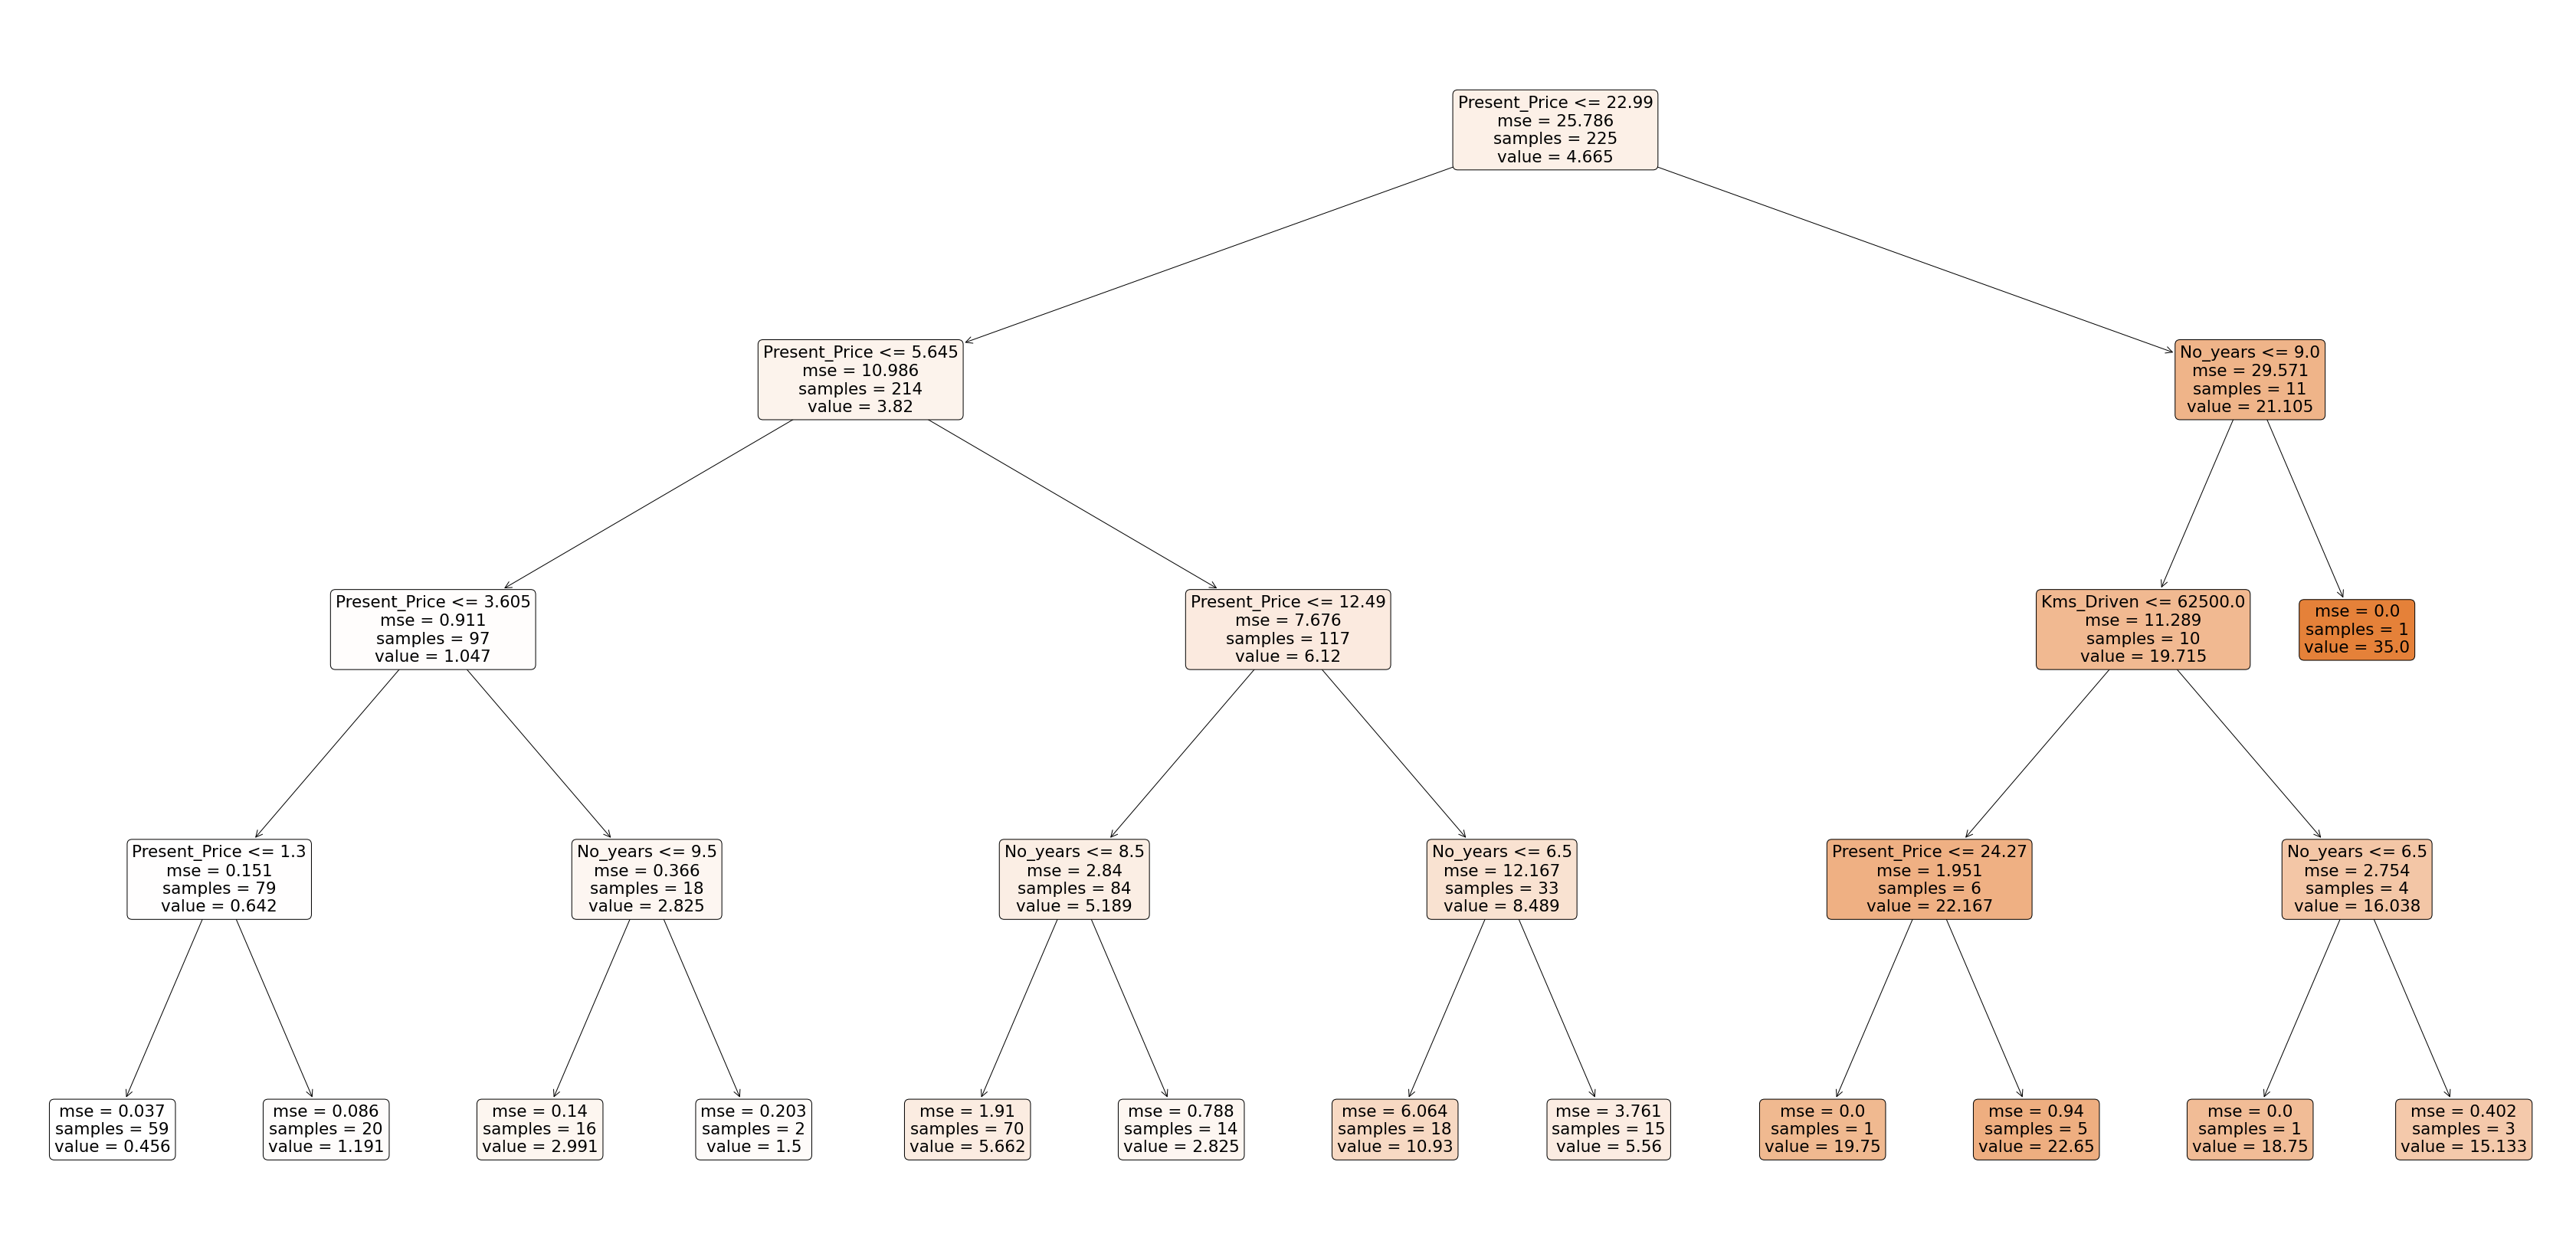

In [23]:
plt_tree(dt)

In [24]:
## Train Data
evaluate_model(dt,X_train,y_train)

0.9443764076149965


In [25]:
## Test Data
evaluate_model(dt,X_test,y_test)

0.3090680175427707


## Classic case of overfitting, the R-Squared in train data came out at 94%, but on test data it came out to a mere 30%

## Random Forest, Let's go...

In [26]:
rf = RandomForestRegressor(random_state=100, n_jobs=-1)

In [27]:
params = {
    'n_estimators':[10,20,30,50,100],
    'max_depth' : [2,3,4,5],
    'min_samples_leaf': [10,15,20,30]
}

In [28]:
grid = GridSearchCV(estimator=rf, param_grid=params, scoring='r2', cv=4, n_jobs=-1, verbose=1)

In [29]:
%%time
grid.fit(X_train,y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.2s


Wall time: 25.2 s


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   25.0s finished


GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [10, 15, 20, 30],
                         'n_estimators': [10, 20, 30, 50, 100]},
             scoring='r2', verbose=1)

In [30]:
## Best 5 estimators
pd.DataFrame(grid.cv_results_).nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
60,0.075380,0.003140,0.020363,0.001797,5,10,10,"{'max_depth': 5, 'min_samples_leaf': 10, 'n_es...",0.866150,0.735069,0.733928,0.553454,0.722150,0.111243,1
40,0.072672,0.003434,0.018155,0.001940,4,10,10,"{'max_depth': 4, 'min_samples_leaf': 10, 'n_es...",0.865877,0.733396,0.733793,0.553428,0.721624,0.111114,2
63,0.259642,0.022619,0.034092,0.005308,5,10,50,"{'max_depth': 5, 'min_samples_leaf': 10, 'n_es...",0.859005,0.725049,0.741175,0.548285,0.718378,0.110986,3
43,0.266654,0.014466,0.030097,0.002408,4,10,50,"{'max_depth': 4, 'min_samples_leaf': 10, 'n_es...",0.858998,0.723648,0.740883,0.548270,0.717950,0.110955,4
64,0.501530,0.055441,0.050659,0.005149,5,10,100,"{'max_depth': 5, 'min_samples_leaf': 10, 'n_es...",0.850994,0.733962,0.739942,0.544661,0.717389,0.110078,5


In [31]:
grid.best_estimator_

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=10,
                      n_jobs=-1, random_state=100)

In [34]:
## Setting the hyperparameters
rf_best=RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=10,
                      n_jobs=-1, random_state=100, oob_score=True)

## Fitting
rf_best.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=10,
                      n_jobs=-1, oob_score=True, random_state=100)

In [35]:
## OOB Score
round(100*(rf_best.oob_score_),2)

74.53

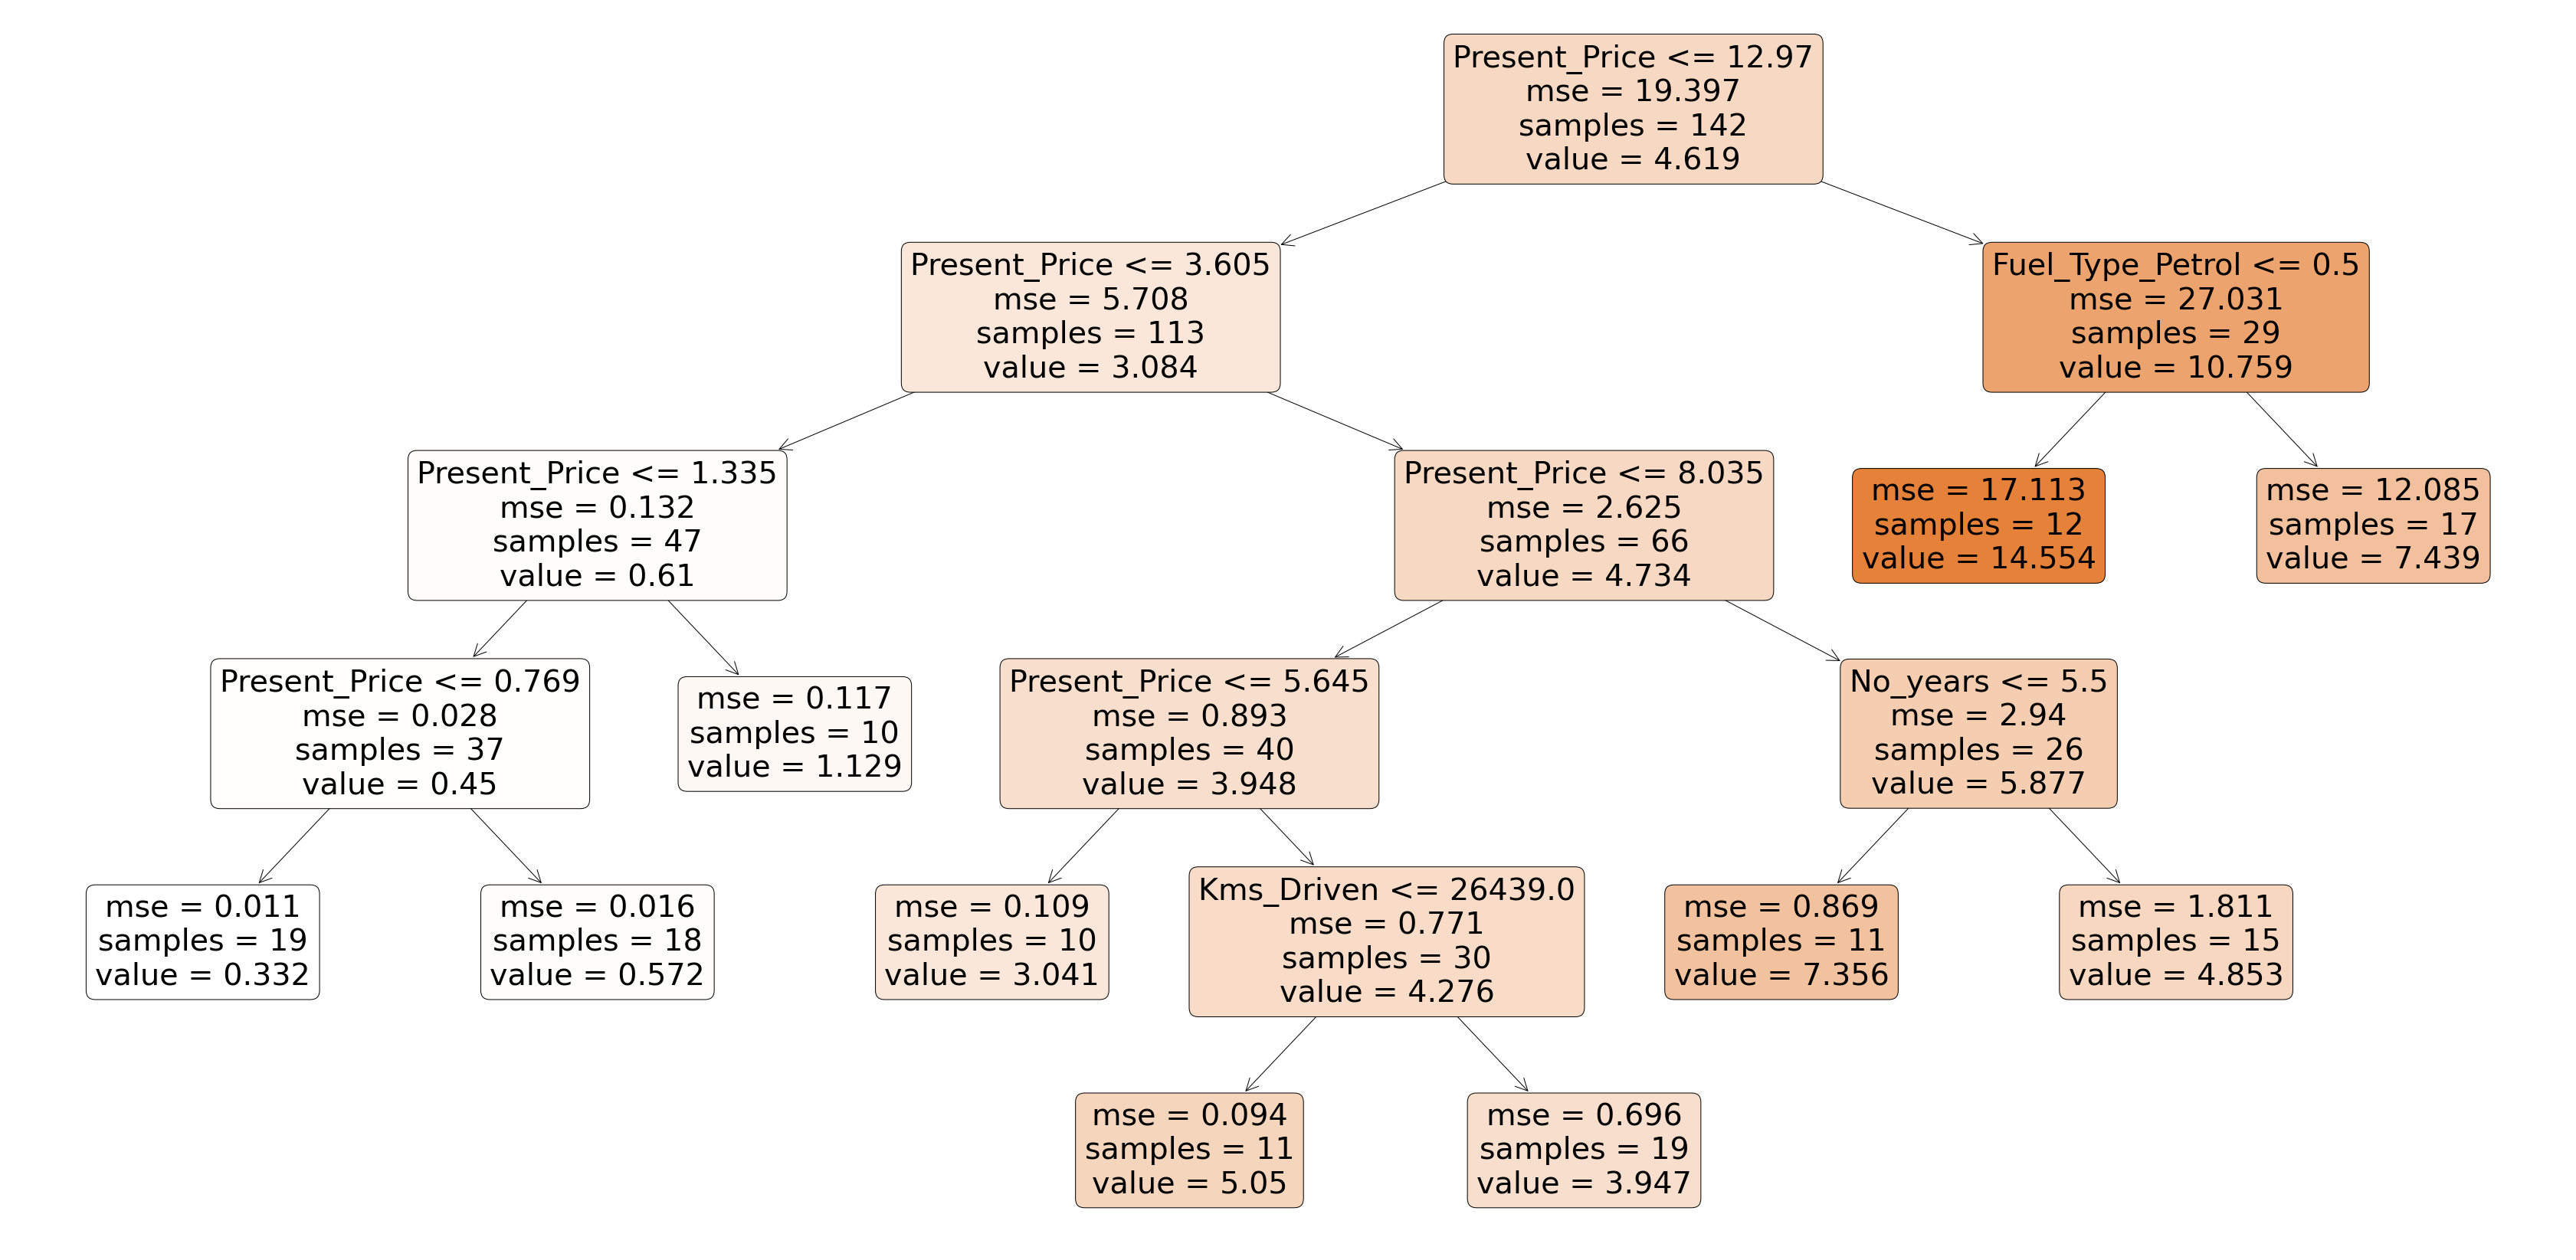

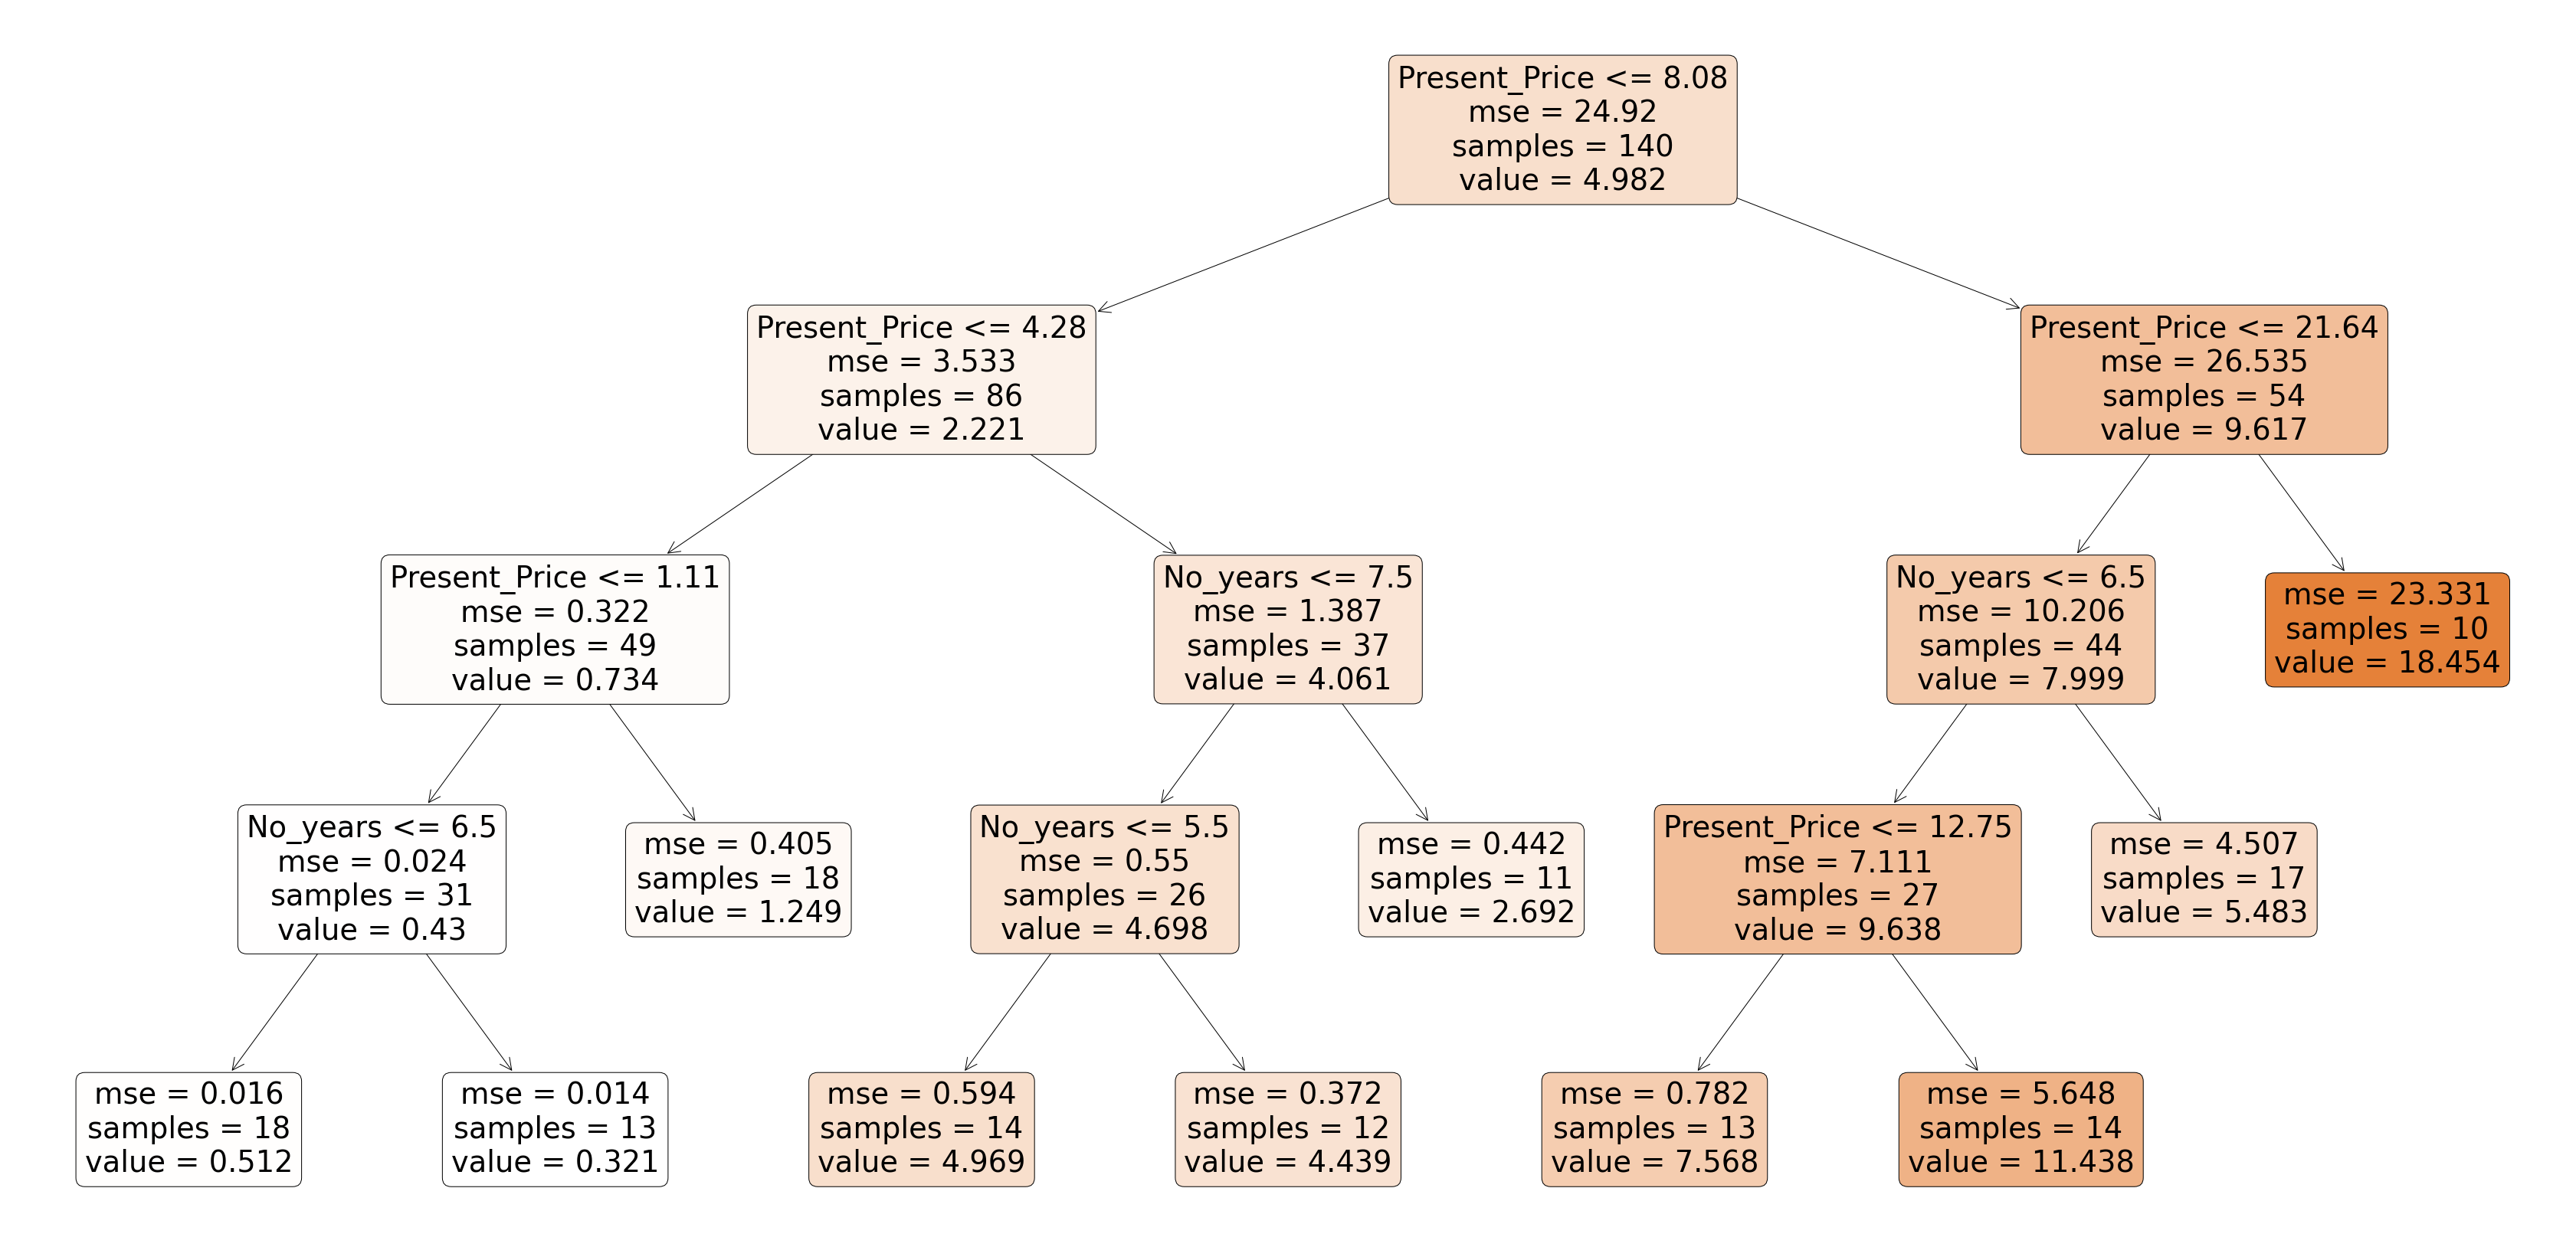

In [36]:
for i in [5,9]:
    plt_tree(rf_best.estimators_[i])

In [37]:
## Train Data
evaluate_model(rf_best,X_train,y_train)

0.8452765735929489


In [38]:
## Test Data
evaluate_model(rf_best,X_test,y_test)

0.7349147624428041


In [43]:
pd.DataFrame({'Features':X_train.columns, 'Importances':rf_best.feature_importances_}).sort_values(by='Importances', ascending=False)

,Features,Importances
0,Present_Price,0.882032
4,No_years,0.051256
5,Fuel_Type_Diesel,0.044414
6,Fuel_Type_Petrol,0.015648
1,Kms_Driven,0.004780
7,Seller_Type_Individual,0.001870
2,Owner,0.000000
3,Wheeler,0.000000
8,Transmission_Manual,0.000000


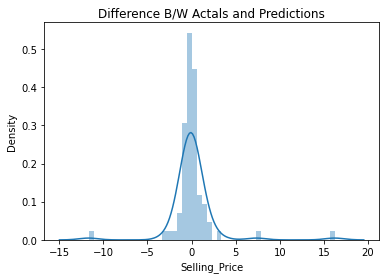

In [56]:
## Predictions
pred = rf_best.predict(X_test)

## Distribution of difference b/w actuals and predictions
sns.distplot(y_test-pred)
plt.title("Difference B/W Actals and Predictions")
plt.show()

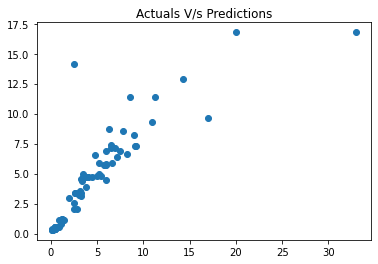

In [54]:
## Scatterplots of actuals vs predictions
plt.scatter(y_test,pred)
plt.title("Actuals V/s Predictions")
plt.show()

In [41]:
## RMSE for both models
print("Random_forrest",np.sqrt(metrics.mean_squared_error(y_train,rf_best.predict(X_train))))
print("DecisionTree",np.sqrt(metrics.mean_squared_error(y_train,dt.predict(X_train))))

Random_forrest 1.9974135395911825
DecisionTree 1.1976211833288348


## The RMSE clearly shows Random Forest is leaps and bounds ahead of Decision Tree, and so does the test predictions shown above